**SASKIA DWI ULFAH**
<br>**(19/439822/TK/48552)**<br/>
**TUGAS REKAYASA DATA** 

# **0. IMPORT LIBRARY**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
sns.set_style('whitegrid')

# **1. READ THE DATASET**

In [56]:
caesarian = pd.read_csv('caesarian.csv')

In [57]:
caesarian.head()

,age,delivery_number,delivery_time,blood_of_pressure,heart_problem,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


# **2. INFORMATION ABOUT DATASET**

We choose age, delivery number, delivery time, blood pressure and heart status.
We classify delivery time to Premature, Timely and Latecomer. As like the delivery time we consider blood pressure in three statuses of Low, Normal and High Moods. Heart Problem is classified as Apt and Inept.

* attribute 'age' 
> { 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38 }
* attribute 'delivery_number' 
> { 1,2,3,4 }
* attribute 'delivery_time' 
> { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
* attribute 'blood_of_pressure' 
> { 0,1,2 } -> {0 = low , 1 = normal , 2 = high }
* attribute 'heart_problem' 
> { 0,1 } -> {0 = apt, 1 = inept }
* attribute'caesarian' 
> { 0,1 } -> {0 = No, 1 = Yes }

Resource:
> https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset

# **3. DATASET BASIC EXPLORATION**

STATISTICAL SUMMARY

In [58]:
caesarian.describe()

,age,delivery_number,delivery_time,blood_of_pressure,heart_problem,caesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


DATASET INFO

In [59]:
caesarian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                80 non-null     int64
 1   delivery_number    80 non-null     int64
 2   delivery_time      80 non-null     int64
 3   blood_of_pressure  80 non-null     int64
 4   heart_problem      80 non-null     int64
 5   caesarian          80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


DATASET DIMENSION

In [60]:
caesarian.shape

(80, 6)

NUMBER OF UNIQUE VALUES IN EACH COLUMN

In [61]:
caesarian.nunique()

age                  22
delivery_number       4
delivery_time         3
blood_of_pressure     3
heart_problem         2
caesarian             2
dtype: int64

DUPLICATE

In [66]:
caesarian['is_duplicated'] = caesarian.duplicated()

In [67]:
caesarian['is_duplicated'].value_counts()

False    76
True      4
Name: is_duplicated, dtype: int64

In [68]:
duplicate = caesarian['is_duplicated'] == True
caesarian[duplicate]

,age,delivery_number,delivery_time,blood_of_pressure,heart_problem,caesarian,is_duplicated
47,32,2,0,2,1,1,True
61,19,1,0,1,0,1,True
71,29,1,2,0,1,1,True
72,28,2,0,1,0,0,True


Data duplicate dianggap sebagai pasien berbeda yang memiliki kondisi yang sama.

In [69]:
caesarian = caesarian.drop('is_duplicated', axis=1)

# **4. EACH COLUMN UNIQUE VALUES**

In [70]:
caesarian['age'].unique()

array([22, 26, 28, 27, 32, 36, 33, 23, 20, 29, 25, 37, 24, 18, 30, 40, 31,
       19, 21, 35, 17, 38])

In [71]:
caesarian['delivery_number'].unique()

array([1, 2, 3, 4])

In [72]:
caesarian['delivery_time'].unique()

array([0, 1, 2])

In [73]:
caesarian['blood_of_pressure'].unique()

array([2, 1, 0])

In [74]:
caesarian['heart_problem'].unique()

array([0, 1])

In [75]:
caesarian['caesarian'].unique()

array([0, 1])

# **5. DATA VISUALIZATION: ALL COLUMNS VS CAESARIAN**

AGE VS CAESARIAN 

<Figure size 1440x1512 with 0 Axes>

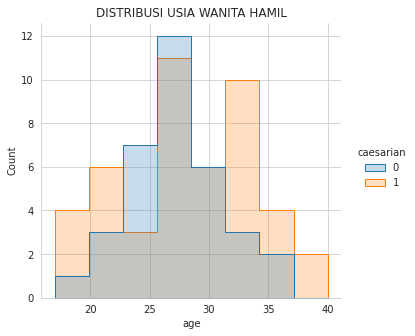

In [76]:
plt.figure(figsize=(20,21))

sns.displot(data=caesarian, x='age', hue='caesarian', element='step', )

plt.title('Distribusi Usia Wanita Hamil'.upper())
plt.subplots_adjust(top=0.88)
plt.savefig('age.jpg')

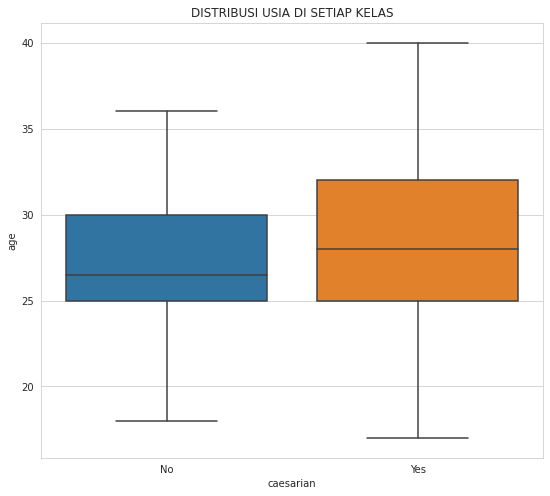

In [77]:
fig, ax = plt.subplots(figsize=(9,8))

sns.boxplot(data=caesarian, y='age', x='caesarian')

ax.set_xticklabels(['No', 'Yes'])
plt.title('Distribusi usia di setiap kelas'.upper())
plt.subplots_adjust(top=0.88)
plt.savefig('age_dist.jpg')

DELIVERY NUMBER VS CAESARIAN

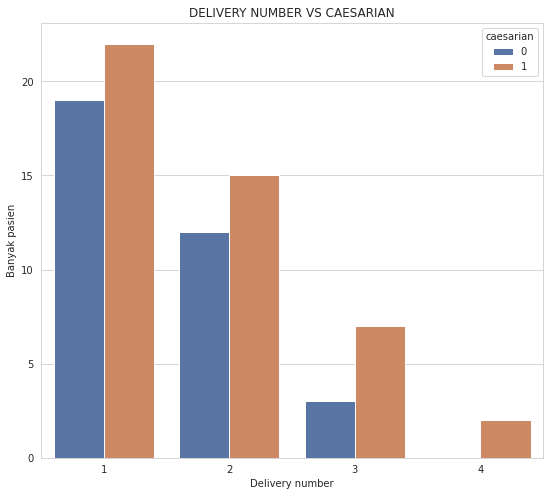

In [78]:
fig, ax = plt.subplots(figsize=(9,8))

sns.countplot(data=caesarian, x='delivery_number', hue='caesarian', palette='deep')

plt.title('DELIVERY NUMBER VS CAESARIAN')
plt.xlabel('Delivery number')
plt.ylabel('Banyak pasien')
plt.subplots_adjust(top=0.88)
plt.savefig('dn_cs.jpg')

DELIVERY TIME VS CAESARIAN 

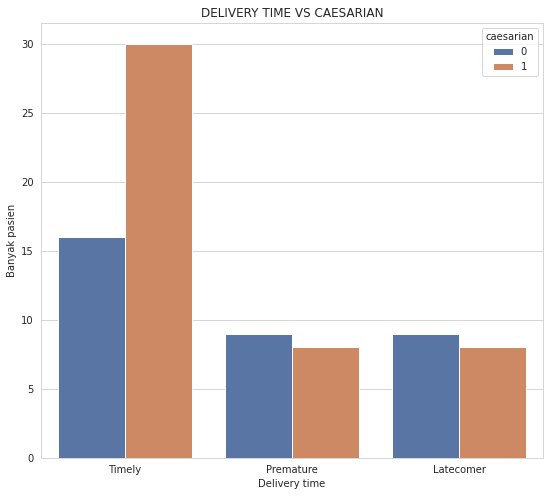

In [79]:
fig, ax = plt.subplots(figsize=(9,8))

sns.countplot(data=caesarian, x='delivery_time', hue='caesarian', palette='deep')

ax.set_xticklabels(['Timely', 'Premature', 'Latecomer'])
plt.title('DELIVERY TIME VS CAESARIAN')
plt.xlabel('Delivery time')
plt.ylabel('Banyak pasien')
plt.subplots_adjust(top=0.88)
plt.savefig('dt_cs.jpg')

Pasien yang melahirkan tepat waktu lebih dominan dalam melahirkan secara caesar. Sementara itu, pasien yang melahirkan lebih cepat (premature) atau lebih lambat (latecomer) memiliki perbandingan cara kelahiran yang hampir seimbang. Lebih banyak dilakukan secara normal.

BLOOD OF PRESSURE VS CAESARIAN

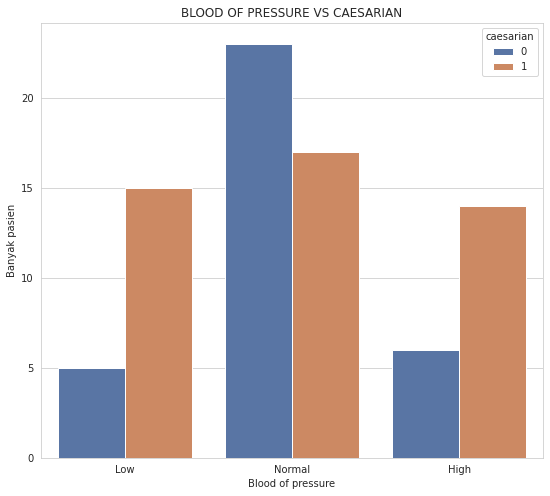

In [80]:
fig, ax = plt.subplots(figsize=(9,8))

sns.countplot(data=caesarian, x='blood_of_pressure', hue='caesarian', palette='deep')

ax.set_xticklabels(['Low', 'Normal', 'High'])
plt.title('BLOOD OF PRESSURE VS CAESARIAN')
plt.xlabel('Blood of pressure')
plt.ylabel('Banyak pasien')
plt.subplots_adjust(top=0.88)
plt.savefig('bld_cs.jpg')

Pasien dengan tekanan darah rendah dan tinggi dominan melakukan caesar dalam proses melahirkan.

HEART PROBLEM VS CAESARIAN 

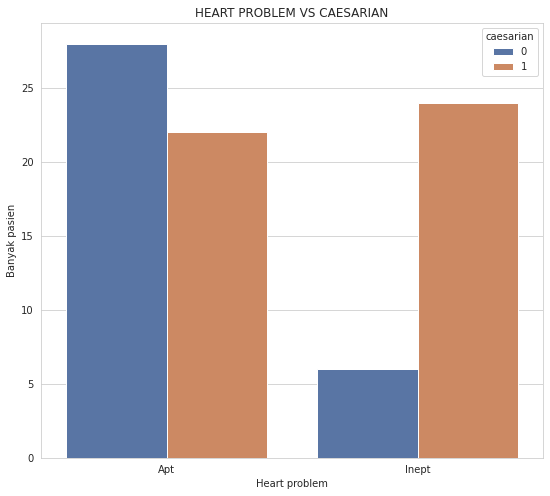

In [81]:
fig, ax = plt.subplots(figsize=(9,8))

sns.countplot(data=caesarian, x='heart_problem', hue='caesarian', palette='deep')

ax.set_xticklabels(['Apt', 'Inept'])
plt.title('HEART PROBLEM VS CAESARIAN')
plt.xlabel('Heart problem')
plt.ylabel('Banyak pasien')
plt.subplots_adjust(top=0.88)
plt.savefig('hrt_cs.jpg')

Perempuan yang memiliki kondisi inept lebih banyak melahirkan dengan cara operasi caesar.

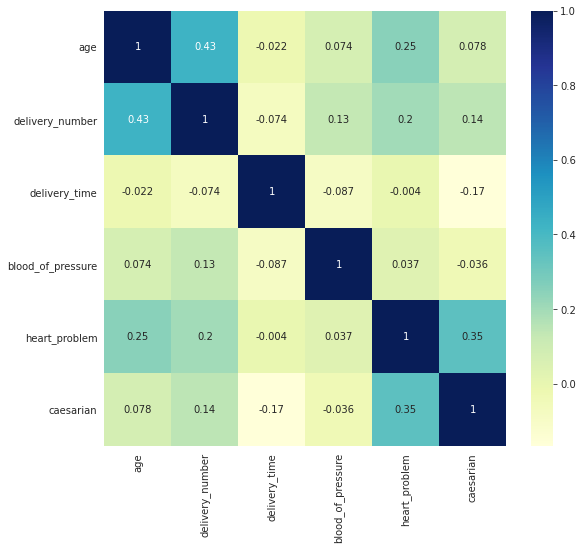

In [88]:
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(caesarian.corr(), cmap="YlGnBu", annot=True)
plt.subplots_adjust(top=0.88)
plt.savefig('corr.jpg')